<a href="https://colab.research.google.com/github/JaradAng/tensorflow_training/blob/main/TF_medical_expense_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import the libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
#Reading in the insurance data set
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [4]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
insurance_one_hot = pd.get_dummies(insurance)

In [7]:
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [8]:
X = insurance_one_hot.drop(columns=['charges'])
y = insurance_one_hot['charges']

In [9]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [10]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [11]:
#Splitting into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [12]:
#checking length
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [13]:
#create model
tf.random.set_seed(42)

ins_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

#compile
ins_model.compile(loss = tf.keras.losses.mae,
                  optimizer = tf.keras.optimizers.SGD(),
                  metrics=['mae'])

#Fit the model
ins_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8536.8818 - mae: 8536.8818
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7817.2993 - mae: 7817.2993
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7591.8706 - mae: 7591.8706
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7668.2153 - mae: 7668.2153
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7673.0830 - mae: 7673.0830
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7606.2773 - mae: 7606.2773
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7529.7305 - mae: 7529.7305
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7748.9663 - mae: 7748.9663
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7479.0654 - mae: 7479.0654
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7737.9722 - mae: 7737.9722

In [14]:
#checking results of insurance model on test data
ins_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8742.9355 - mae: 8742.9355


[8742.935546875, 8742.935546875]

In [15]:
y_train.mean(),y_train.median()

(13346.089736364485, 9575.4421)

To try and improve our model I will decrease the units but add more training epochs

In [16]:
#build model 2
tf.random.set_seed(42)

ins_model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

#compile
ins_model2.compile(loss= tf.keras.losses.mae,
                   optimizer = tf.keras.optimizers.SGD(),
                   metrics=['mae'])

#Fit model
ins_model2.fit(X_train, y_train, epochs = 500)

Epoch 1/500
34/34 [==============================] - 0s 2ms/step - loss: 8620.2266 - mae: 8620.2266
Epoch 2/500
34/34 [==============================] - 0s 2ms/step - loss: 7875.7515 - mae: 7875.7515
Epoch 3/500
34/34 [==============================] - 0s 2ms/step - loss: 7531.1113 - mae: 7531.1113
Epoch 4/500
34/34 [==============================] - 0s 2ms/step - loss: 7695.4990 - mae: 7695.4990
Epoch 5/500
34/34 [==============================] - 0s 2ms/step - loss: 7739.2988 - mae: 7739.2988
Epoch 6/500
34/34 [==============================] - 0s 2ms/step - loss: 7687.8413 - mae: 7687.8413
Epoch 7/500
34/34 [==============================] - 0s 2ms/step - loss: 7511.4585 - mae: 7511.4585
Epoch 8/500
34/34 [==============================] - 0s 2ms/step - loss: 7806.7446 - mae: 7806.7446
Epoch 9/500
34/34 [==============================] - 0s 2ms/step - loss: 7471.9092 - mae: 7471.9092
Epoch 10/500
34/34 [==============================] - 0s 2ms/step - loss: 7758.6733 - mae: 7758.6733

In [17]:
ins_model2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4513.1807 - mae: 4513.1807


[4513.1806640625, 4513.1806640625]

Lets try another improvement. Lets add an additional layer

In [18]:
#Build model
tf.random.set_seed(42)

ins_model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

#Compile
ins_model3.compile(loss=tf.keras.losses.mae,
                   optimizer= tf.keras.optimizers.Adam(),
                   metrics=['mae'])

#Fit
history = ins_model3.fit(X_train, y_train, epochs=500)

Epoch 1/500
34/34 [==============================] - 1s 3ms/step - loss: 13279.2422 - mae: 13279.2422
Epoch 2/500
34/34 [==============================] - 0s 3ms/step - loss: 13042.9131 - mae: 13042.9131
Epoch 3/500
34/34 [==============================] - 0s 3ms/step - loss: 12448.0527 - mae: 12448.0527
Epoch 4/500
34/34 [==============================] - 0s 3ms/step - loss: 11157.4893 - mae: 11157.4893
Epoch 5/500
34/34 [==============================] - 0s 4ms/step - loss: 9260.6621 - mae: 9260.6621
Epoch 6/500
34/34 [==============================] - 0s 3ms/step - loss: 7738.7183 - mae: 7738.7183
Epoch 7/500
34/34 [==============================] - 0s 3ms/step - loss: 7435.5928 - mae: 7435.5928
Epoch 8/500
34/34 [==============================] - 0s 3ms/step - loss: 7408.7002 - mae: 7408.7002
Epoch 9/500
34/34 [==============================] - 0s 3ms/step - loss: 7382.7852 - mae: 7382.7852
Epoch 10/500
34/34 [==============================] - 0s 3ms/step - loss: 7358.7905 - mae: 7

In [19]:
ins_model3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3159.3394 - mae: 3159.3394


[3159.33935546875, 3159.33935546875]

In [20]:
ins_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8742.9355 - mae: 8742.9355


[8742.935546875, 8742.935546875]

In [21]:
ins_model2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4513.1807 - mae: 4513.1807


[4513.1806640625, 4513.1806640625]

Text(0, 0.5, 'loss')

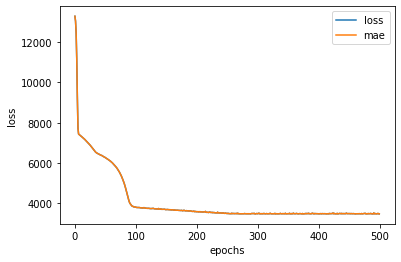

In [24]:
#plot history or loss curve or training curve
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')

How long do we train for?

it depends on the model and how much resources you have. But tensorflow can use EarlyStopping Callback which is a tf compenent you can add to your model to stpo training once it stops improving a certain metric

### More preprocessing with standardization

In [26]:
#Reading in the insurance data set
insurance2 = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

insurance2.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [27]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

ct=make_column_transformer((MinMaxScaler(), ['age', 'bmi', 'children']),(OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker','region']))

#Create x and y

X = insurance2.drop('charges', axis=1)
y=insurance2['charges']

#split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

#fit the col transformer
ct.fit(X_train)

#Transforming train and test with nornalization
X_train_normal = ct.transform(X_train)

X_test_normal = ct.transform(X_test)


In [29]:
X_train.loc[0], X_train_normal[0]

(age                19
 sex            female
 bmi              27.9
 children            0
 smoker            yes
 region      southwest
 Name: 0, dtype: object,
 array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]))

In [30]:
#How have shapes changed
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [32]:
#build a model
tf.random.set_seed(42)

ins_norm_model = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

#comile the model
ins_norm_model.compile(loss=tf.keras.losses.mae,
                       optimizer=tf.keras.optimizers.Adam(),
                       metrics=['mae'])


#Fit the model
ins_norm_model.fit(X_train_normal, y_train, epochs=500)

Epoch 1/500
34/34 [==============================] - 1s 2ms/step - loss: 13343.1963 - mae: 13343.1963
Epoch 2/500
34/34 [==============================] - 0s 2ms/step - loss: 13331.0625 - mae: 13331.0625
Epoch 3/500
34/34 [==============================] - 0s 2ms/step - loss: 13295.3457 - mae: 13295.3457
Epoch 4/500
34/34 [==============================] - 0s 2ms/step - loss: 13211.9893 - mae: 13211.9893
Epoch 5/500
34/34 [==============================] - 0s 2ms/step - loss: 13054.2432 - mae: 13054.2432
Epoch 6/500
34/34 [==============================] - 0s 2ms/step - loss: 12794.8730 - mae: 12794.8730
Epoch 7/500
34/34 [==============================] - 0s 2ms/step - loss: 12407.3701 - mae: 12407.3701
Epoch 8/500
34/34 [==============================] - 0s 2ms/step - loss: 11872.6572 - mae: 11872.6572
Epoch 9/500
34/34 [==============================] - 0s 2ms/step - loss: 11211.3506 - mae: 11211.3506
Epoch 10/500
34/34 [==============================] - 0s 3ms/step - loss: 10518.33

In [37]:
ins_norm_model.evaluate(X_test_normal, y_test)


9/9 [==============================] - 0s 5ms/step - loss: 3163.1660 - mae: 3163.1660


[3163.166015625, 3163.166015625]

In [38]:
 ins_model3.evaluate(X_test, y_test)

ValueError: ignored